In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd
from src.get_data import *
import random

2021-05-15 05:18:32,149 INFO     pid:44 matplotlib.font_manager:1439:_load_fontmanager generated new fontManager


In [3]:
# lumps that potentially look like nodules
data_candit = pd.read_csv(data_path / 'candidates.csv')
print(len(data_candit))
print(data_candit.seriesuid.nunique())

seriesuid_1 = data_candit.query('`class` == 1').seriesuid
seriesuid_c = data_candit.seriesuid
print(len(seriesuid_1), len(seriesuid_1.unique()))

data_candit.head()

551065
888
1351 590


seriesuid  coordX  coordY  coordZ  \
0  1.3.6.1.4.1.14519.5.2.1.6279.6001.100225287222...  -56.08  -67.85 -311.92   
1  1.3.6.1.4.1.14519.5.2.1.6279.6001.100225287222...   53.21 -244.41 -245.17   
2  1.3.6.1.4.1.14519.5.2.1.6279.6001.100225287222...  103.66 -121.80 -286.62   
3  1.3.6.1.4.1.14519.5.2.1.6279.6001.100225287222...  -33.66  -72.75 -308.41   
4  1.3.6.1.4.1.14519.5.2.1.6279.6001.100225287222...  -32.25  -85.36 -362.51   

   class  
0      0  
1      0  
2      0  
3      0  
4      0

In [4]:
# lumps that have been flagged as nodules
data_annot = pd.read_csv(data_path / 'annotations.csv')
print(len(data_annot))
print(data_annot.seriesuid.nunique())
seriesuid_a = data_annot.seriesuid

data_annot.head()

1186
601


seriesuid      coordX      coordY  \
0  1.3.6.1.4.1.14519.5.2.1.6279.6001.100225287222... -128.699421 -175.319272   
1  1.3.6.1.4.1.14519.5.2.1.6279.6001.100225287222...  103.783651 -211.925149   
2  1.3.6.1.4.1.14519.5.2.1.6279.6001.100398138793...   69.639017 -140.944586   
3  1.3.6.1.4.1.14519.5.2.1.6279.6001.100621383016...  -24.013824  192.102405   
4  1.3.6.1.4.1.14519.5.2.1.6279.6001.100621383016...    2.441547  172.464881   

       coordZ  diameter_mm  
0 -298.387506     5.651471  
1 -227.121250     4.224708  
2  876.374496     5.786348  
3 -391.081276     8.143262  
4 -405.493732    18.545150

In [5]:
%%time
candidateInfo_list = getCandidateInfoList(requireOnDisk_bool=True)

CPU times: user 3.27 s, sys: 168 ms, total: 3.44 s
Wall time: 3.5 s


In [6]:
%%time
candidateInfo_list = getCandidateInfoList(requireOnDisk_bool=True)

CPU times: user 338 µs, sys: 0 ns, total: 338 µs
Wall time: 309 µs


In [7]:
len(candidateInfo_list)

56938

In [8]:
positiveInfo_list = [x for x in candidateInfo_list if x.isNodule_bool]
print(len(positiveInfo_list))
negativeInfo_list = [x for x in candidateInfo_list if not x.isNodule_bool]
print(len(negativeInfo_list))

print(len(positiveInfo_list)/len(negativeInfo_list)*100)

122
56816
0.21472824556462966


In [9]:
diameter_list = [x.diameter_mm for x in positiveInfo_list]
diameter_list[::10]

[25.23320204,
 17.75323185,
 13.84883567,
 11.48732767,
 9.443896197,
 7.98502287,
 7.000523906,
 6.401625027,
 5.965579845,
 5.253525386,
 5.05940652,
 4.343199739,
 0.0]

In [10]:
candidateInfo_list[0]

CandidateInfoTuple(isNodule_bool=True, diameter_mm=25.23320204, series_uid='1.3.6.1.4.1.14519.5.2.1.6279.6001.511347030803753100045216493273', center_xyz=(63.4740118048, 73.9174523314, -213.736128767))

In [27]:
ct = getCt(series_uid=candidateInfo_list[0].series_uid)

In [28]:
candidateInfo_list[0]

CandidateInfoTuple(isNodule_bool=True, diameter_mm=25.23320204, series_uid='1.3.6.1.4.1.14519.5.2.1.6279.6001.511347030803753100045216493273', center_xyz=(63.4740118048, 73.9174523314, -213.736128767))

In [162]:
ct_chunk, center_irc = ct.getRawCandidate(candidateInfo_list[0].center_xyz, width_irc = (32, 32, 32))

In [163]:
ct_chunk = ct_chunk + ct_chunk.min()

ct_chunk = ct_chunk/ct_chunk.max()

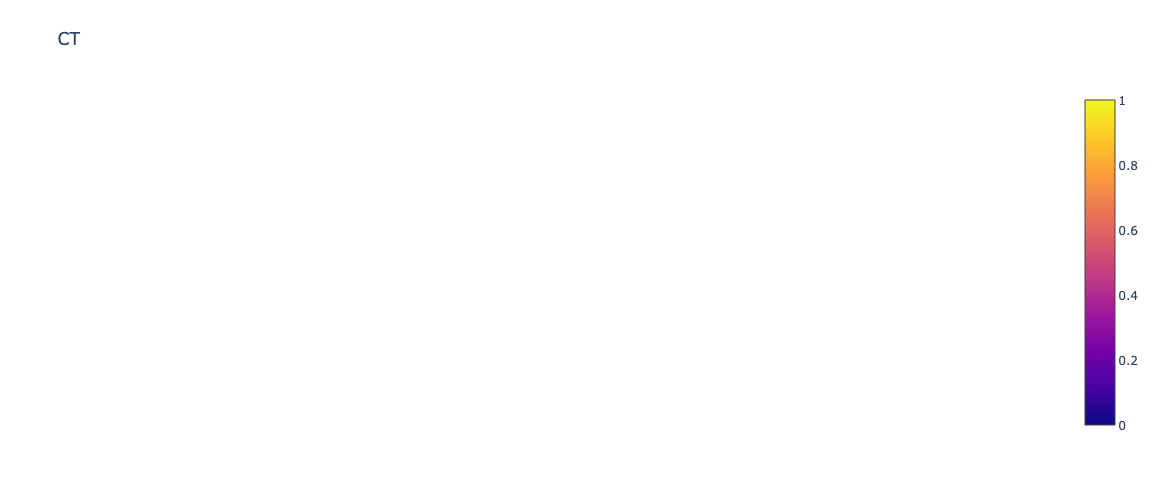

In [167]:
import plotly.graph_objects as go
X, Y, Z = np.mgrid[-1:1:32j, -1:1:32j, -1:1:32j]

fig = go.Figure(data=[
            
            go.Volume(
                x=X.flatten(),
                y=Y.flatten(),
                z=Z.flatten(),
                value=ct_chunk.flatten(),
                isomin=0.0,
                isomax=1.0,
                opacity=0.1,
                surface_count=20
                )])

fig.update_layout(title='CT', autosize=False,
                    width=500, height=500,
                    margin=dict(l=65, r=50, b=65, t=90))

#fig.show() #write_html(('/tmp/myapp/test.html'))